# Oh hey

This homework is just coding. We will be working with a simple example from OpenAI gym called "Frozen Lake". It is a text-based maze environment that your controller will learn to navigate. It is slippery, however, so sometimes you don't always move where you try to go.

In [1]:
import gym
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

%matplotlib inline
env=gym.make('FrozenLake-v0')
env.render()


SFFF
FHFH
FFFH
HFFG


The board can be interpretted as follows
* S - Start State
* F - Frozen parts
* H - Holes
* G - Goal

The episode ends if you hit a hole or the goal state. You recieve a reward of $1$ if you reach the goal and a reward of $0$ otherwise.

In [2]:
s = env.reset()

done = False
R = []
while not done:
    a = env.action_space.sample()
        
    s, r, done, info = env.step(a)
    R.append(r)

    
env.render()
print(R)

  (Down)
SFFF
FHFH
FFFH
HFFG
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


# Question

Use on-policy Monte Carlo control to learn a policy for this problem. (See 5.4 of the book.) Simulate $100,000$ episodes. Let $G^i$ be the total reward for episode $i$. 

Make a plot of $\frac{1}{i}\sum_{j=1}^i G^j$ (the running average of the rewards), for $i=1$ to $100,000$. Try to get it to learn well, but don't spend forever tuning parameters. Go outside. Treat yourself. 

Here are some tips about the learning process.

* With well-tuned controller, average rewards of around 0.7 are possible. (That is, it is solved 70% of the time) 
* With the basic Monte Carlo controller, you probably won't get very close to that after $100,000$ steps. (Average rewards between 0.2 and 0.4 would be more likely.)
* The main free parameter in the Monte Carlo algorithm is $\epsilon$, which is the probability that you choose the action completely at random. Typically $\epsilon$ must start fairly large, to promote exploration, and then decrease as more data has been collected. A reasonble tuning rule takes the form $\epsilon_i = i^{-\beta}$ on episode $i$, where $\beta\in (0,1)$. You may need to play around with this to get good results. 
* The performance of the learning algorithm can vary from trial to trial due to randomness.
* If an episode is taking a long time, the environment will time out. When that happens, the `info` dictionary will have an entry with key 'TimeLimit.truncated'. This is not a big deal for the Monte Carlo method. It will be important when we start doing policy iteration on the estimated model.

In [3]:
# Make your simulation here

1000 0.005
2000 0.009
3000 0.021666666666666667
4000 0.0295
5000 0.0346
6000 0.03933333333333333
7000 0.04214285714285714
8000 0.0485
9000 0.05255555555555556
10000 0.0587
11000 0.06272727272727273
12000 0.06508333333333334
13000 0.06884615384615385
14000 0.07057142857142858
15000 0.07333333333333333
16000 0.0764375
17000 0.08035294117647059
18000 0.08261111111111111
19000 0.08505263157894737
20000 0.0875
21000 0.09
22000 0.09140909090909091
23000 0.09217391304347826
24000 0.09429166666666666
25000 0.09528
26000 0.09684615384615385
27000 0.09822222222222222
28000 0.09892857142857144
29000 0.09937931034482758
30000 0.1002
31000 0.10135483870967742
32000 0.10215625
33000 0.10278787878787879
34000 0.10352941176470588
35000 0.10388571428571429
36000 0.10430555555555555
37000 0.10491891891891891
38000 0.10555263157894737
39000 0.10576923076923077
40000 0.10605
41000 0.10670731707317073
42000 0.10723809523809524
43000 0.10751162790697674
44000 0.10756818181818181
45000 0.10806666666666667
46

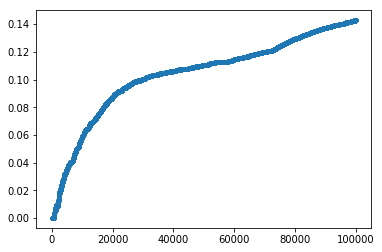

In [4]:
# Solution

import finiteStateAgents as fs


NumEpisodes = 100000
agent = fs.mcAgent(env,epsilon=1.,gamma = 0.99)
beta = .3

R_tot = []

for ep in range(NumEpisodes):
    s = env.reset()
    epsilon = (1/(1+ep))**(beta)
    agent.epsilon = epsilon
    R = []
    done = False
    while not done:
        
        a = agent.action(s)
        
        s_next, reward, done, info = env.step(a)
        agent.update(s,a,reward,s_next,done,info)
        s = s_next
        R.append(reward)
        if done:
                
            R_tot.append(np.sum(R))
            break
            
    if ((ep+1) % 1000) == 0:
        print(ep+1,np.sum(R_tot)/(ep+1))
            
            
            
plt.plot(np.cumsum(R_tot)/np.arange(1,NumEpisodes+1),'.')

# Question

Now design a controller that learns a model for the transition probabilities, $p(s'|s,a)$ and the rewards $r(s,a) = \mathbb{E}[R_{t+1}|S_t = s,A_t = a]$, and uses the estimates for policy iterations.

Specifically, do the following. Fix some initial policy. Then repeat the following procedure for 100,000 (or fewer if your code is very slow) steps:

* Simulate an episode with the current policy.
* Use the new data to update your model of $p(s'|s,a)$ and $r(s,a)$.
* Compute an updated policy by policy iteration.
* Modify the policy to make it $\epsilon$-greedy.

Some tips:
* For policy iteration to work properly, you need to ensure that $p(\hat s | \hat s,a)=1$ and $r(\hat s,a)=0$ for all terminal states, $\hat s$. 
* You can check that a state is terminal if it is the state returned by the `env.step` function when the episode ends normally. That is when `done` is `True` and `info['TimeLimit.truncated']` is not `True`.
* When the episode ends normally, `'TimeLimit.truncated'` will not be a key of the `info` dictionary.
* You will need to use a discount factor $0 < \gamma < 1$  to ensure tht policy evaluation is solvable.
* The matrix vector version of policy evaluation from the last will likely be more efficient than the iteration described in the book.
* You will still need to decrease $\epsilon$ as the number of episodes increases as above.
* This strategy should improve more quickly (as a function of the episode count) than the basic Monte Carlo method, at the expense of extra computation.
* There is a good chance you won't be able to get up to rewards in the 0.7 range without tuning $\epsilon$ very well or running a very large number of episodes.

In [5]:
# Make your simulation here

1000 0.242
2000 0.3145
3000 0.348
4000 0.3675
5000 0.3804
6000 0.392
7000 0.4035714285714286
8000 0.4135
9000 0.42344444444444446
10000 0.4316
11000 0.43827272727272726
12000 0.44333333333333336
13000 0.4500769230769231
14000 0.45721428571428574
15000 0.46166666666666667
16000 0.466
17000 0.468
18000 0.471
19000 0.47489473684210526
20000 0.4768
21000 0.4814761904761905
22000 0.48368181818181816
23000 0.4856521739130435
24000 0.4895
25000 0.49252
26000 0.49588461538461537
27000 0.49737037037037035
28000 0.49889285714285714
29000 0.5010689655172413
30000 0.5027
31000 0.5048387096774194
32000 0.5059375
33000 0.508090909090909
34000 0.5089117647058824
35000 0.5104285714285715
36000 0.5114166666666666
37000 0.5131621621621621
38000 0.5143157894736842
39000 0.5149230769230769
40000 0.516375
41000 0.5176585365853659
42000 0.5186666666666667
43000 0.5196279069767442
44000 0.5207954545454545
45000 0.5224444444444445
46000 0.5232608695652174
47000 0.5241702127659574
48000 0.5255416666666667
4900

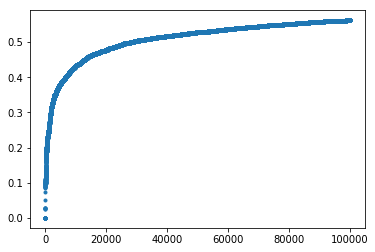

In [6]:
# Solution

import finiteStateAgents as fs


NumEpisodes = 100000
agent = fs.piAgent(env,epsilon=1.,gamma = 0.99)
beta = .3

R_tot = []

for ep in range(NumEpisodes):
    s = env.reset()
    epsilon = (1/(1+ep))**(beta)
    agent.epsilon = epsilon
    R = []
    done = False
    while not done:
        a = agent.action(s)
        
        s_next, reward, done, info = env.step(a)
        agent.update(s,a,reward,s_next,done,info)
        s = s_next
        R.append(reward)
        if done:
                
            R_tot.append(np.sum(R))
            break
            
    if ((ep+1) % 1000) == 0:
        print(ep+1,np.sum(R_tot)/(ep+1))
            
            
            
plt.plot(np.cumsum(R_tot)/np.arange(1,NumEpisodes+1),'.')